In [2]:
import pandas as pd 
import numpy as np
from scipy.stats import chi2_contingency
from tableone import TableOne

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [4]:
# table comparing. baseline and longituidnal 
tpath = "/Users/mlin2/Desktop/RabLab/eoad_sustain_ml/data"
t1 = pd.read_csv(f"{tpath}/tableone_dat.csv")
long = pd.read_csv(f"{tpath}/combined_exclude_long_forR_longi.csv")
t1["followed"] = t1["subj"].isin(long["subj"].unique()).astype(int)

In [8]:
t1[~t1.poorly]['Cognitive Behavior'].value_counts()

Cognitive Behavior
Amnestic-predominant CI (single/multi-domain)    290
PCA                                               24
PPA                                               23
Non-amnestic CI (single/multi-domain)             22
Name: count, dtype: int64

# stage group proportions

In [5]:
# reviewer 1: categorical distribution of stages across three groups 

# rows = subtypes, columns = stage bins
table = np.array([
    [22, 34, 43, 45],  # S1
    [6,  34, 49, 22],  # S2
    [17, 22, 41, 24]   # S3
])

chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi-square = {chi2:.1f}")
print(f"df = {dof}")
print(f"p-value = {p:.2g}")
 
table.sum()




Chi-square = 15.9
df = 6
p-value = 0.014


359

In [6]:
# proportion
rows = ["S1", "S2", "S3"]
cols = ["Group1", "Group2", "Group3", "Group4"]

df = pd.DataFrame(table, index=rows, columns=cols)

# row-wise percentages
df_pct = df.div(df.sum(axis=1), axis=0) * 100

# optional: round for table display
df_pct = df_pct.round(1)

print(df_pct)


    Group1  Group2  Group3  Group4
S1    15.3    23.6    29.9    31.2
S2     5.4    30.6    44.1    19.8
S3    16.3    21.2    39.4    23.1


# lower stage baselien count 

In [35]:

low_stage = t1[t1.stage <= 12]
low_stage_long = long[long.subj.isin(low_stage.subj)]
visits_per_subject = (
    low_stage_long
        .groupby(["subj", "subtype"])["ftp_date"]
        .nunique()
        .reset_index(name="n_visits")
)
summary = (
    visits_per_subject
        .groupby(["subtype", "n_visits"])
        .size()
        .reset_index(name="n_participants")
        .sort_values(["subtype", "n_visits"])
)

summary.transpose()


,0,1,2,3,4,5,6,7,8,9,10,11
subtype,1,1,1,1,2,2,2,2,3,3,3,3
n_visits,1,2,3,4,1,2,3,4,1,2,3,4
n_participants,13,25,5,2,7,21,5,3,8,15,11,4


# add the long dataframe for stage strata

In [9]:
long.subj.nunique()

201

In [10]:
long.columns

Index(['subj', 'fbb_date', 'amy_file', 'ftp_file', 'ftp_date', 'event',
       'SUVR Frontal', 'SUVR MesialTemporal', 'SUVR MetaTemporal',
       'SUVR TemporoParietal', 'SUVR Universal', 'SUVR PET-Only Composite',
       'SUVR MRI-Based Composite', 'Centiloids MRI-Based Composite', 'Gender',
       'Yrs. of Education', 'Age', 'Diagnosis', 'CDR-SB', 'CDR-Global', 'MMSE',
       'Total 13', 'ApoE4', 'ApoE4 Carrier', 'ApoE4 Genotype',
       'Delayed Recall', 'Digit Total', 'Cognitive Behavior', 'Language CI',
       'Attention CI', 'Executive CI', 'Visuospatial CI', 'Memory CI', 'L_MTL',
       'R_MTL', 'L_temporal', 'R_temporal', 'L_frontal', 'R_frontal',
       'L_occipital', 'R_occipital', 'L_parietal', 'R_parietal', 'L_MTL_z',
       'R_MTL_z', 'L_temporal_z', 'R_temporal_z', 'L_frontal_z', 'R_frontal_z',
       'L_occipital_z', 'R_occipital_z', 'L_parietal_z', 'R_parietal_z',
       'visit', 'subtype', 'stage', 'subtype_prob', 'stage_prob', 'fname',
       'poorly', 'CDR-Global.bas

In [12]:
lme = pd.read_csv("/Volumes/petcore/Personal/marlenelin/sustain_proj/code/cluster_analysis/type assignment/202510_voxelstat_lme.csv")
lme_long = pd.read_csv("/Volumes/petcore/Personal/marlenelin/sustain_proj/code/cluster_analysis/type assignment/202510_voxelstat_lme_longi_only.csv")

In [13]:
lme_long['stage_baseline'] = lme_long.subj.replace(dict(zip(t1.subj,t1.stage)))

/var/folders/4_/cjf386ls6qbdt4chbrjvnhfm0000gn/T/ipykernel_91714/2874839408.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lme_long['stage_baseline'] = lme_long.subj.replace(dict(zip(t1.subj,t1.stage)))


In [14]:
lme_long[lme_long.stage_baseline <= 12].subtype.value_counts()

subtype
1.0    93
3.0    81
2.0    77
Name: count, dtype: int64

In [15]:
lme_long[lme_long.stage_baseline > 12].subtype.value_counts()

subtype
3.0    88
1.0    87
2.0    83
Name: count, dtype: int64

In [16]:
lme_long['low_stage'] = lme_long.stage_baseline <= 12  
lme_long['low_stage'] = lme_long['low_stage'].astype(int)

In [17]:
lme_long['high_stage'] = lme_long.stage_baseline > 12 
lme_long['high_stage'] = lme_long['high_stage'].astype(int)

In [18]:
lme_long_s1 = lme_long[lme_long.subtype==1]
lme_long_s3 = lme_long[lme_long.subtype==3]
lme_long_s2 = lme_long[lme_long.subtype==2]
len(lme_long_s1),len(lme_long_s2),len(lme_long_s3)


(180, 160, 169)

In [42]:
lme_long .groupby(["subtype", "low_stage"])["subj"].nunique()

subtype  low_stage
1.0      0            37
         1            36
2.0      0            34
         1            30
3.0      0            34
         1            30
Name: subj, dtype: int64

In [41]:
lme_long .groupby(["subtype", "high_stage"])["subj"].nunique()

subtype  high_stage
1.0      0             36
         1             37
2.0      0             30
         1             34
3.0      0             30
         1             34
Name: subj, dtype: int64

In [ ]:
#lme_long_s1.to_csv("202601_lme_stagefix_s1.csv",index=False)
#lme_long_s2.to_csv("202601_lme_stagefix_s2.csv",index=False)
#lme_long_s3.to_csv("202601_lme_stagefix_s3.csv",index=False)

In [56]:
bl_stagebin_merge = t1.merge(how="left",right=lme_long[["subj","low_stage"]],on=["subj"]).drop_duplicates("subj")

In [60]:
bl_stagebin_merge = bl_stagebin_merge.dropna(subset=["low_stage"])[["subj","subtype","low_stage","ftp_file"]]

In [61]:
bl_stagebin_merge.isna().sum()

subj         0
subtype      0
low_stage    0
ftp_file     0
dtype: int64

In [62]:
len(bl_stagebin_merge)

201

In [68]:
bl_stagebin_merge['ftp_file'] = '/shared/petcore/Personal/marlenelin/sustain_proj/images/wr' +bl_stagebin_merge['ftp_file'] + "_suvr-infcblgm.nii"

In [70]:
bl_stagebin_merge['ftp_file'].values[1]

'/shared/petcore/Personal/marlenelin/sustain_proj/images/wrLDS0070174_FTP_2019-09-11_suvr-infcblgm.nii'

In [69]:
bl_stagebin_merge.to_csv("for_baseline_stagebin_subtype_avg.csv",index=False)

# followed up percentage

In [23]:
 
t1["subtype_cat"] = t1["subtype"].astype("category")
# optional: rename categories if your subtype labels are 1/2/3
# t1["subtype_cat"] = t1["subtype_cat"].cat.rename_categories({1: "S1", 2: "S2", 3: "S3"})

# 2) contingency table: rows=subtype, cols=follow-up status
ct = pd.crosstab(t1["subtype_cat"], t1["followed"])
print("Contingency table (subtype x followed):\n", ct, "\n")

# 3) chi-square test of independence
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-square test: chi2={chi2:.3f}, dof={dof}, p={p:.4g}\n")

# 4) check expected counts (if any < 5, consider exact test)
expected_df = pd.DataFrame(expected, index=ct.index, columns=ct.columns)
print("Expected counts:\n", expected_df, "\n")
print("Any expected cell < 5?:", (expected_df < 5).any().any())

# 5) (optional) column percentages for reporting
col_pct = ct.div(ct.sum(axis=0), axis=1) * 100
print("\nColumn % (within followed status):\n", col_pct.round(1)) 

Contingency table (subtype x followed):
 followed      0   1
subtype_cat        
1            75  73
2            47  64
3            42  64 

Chi-square test: chi2=3.482, dof=2, p=0.1754

Expected counts:
 followed             0          1
subtype_cat                      
1            66.498630  81.501370
2            49.873973  61.126027
3            47.627397  58.372603 

Any expected cell < 5?: False

Column % (within followed status):
 followed        0     1
subtype_cat            
1            45.7  36.3
2            28.7  31.8
3            25.6  31.8


# figure out baseline date 

In [24]:
t1["ftp_date"] = pd.to_datetime(
    t1["ftp_date"],
    format="%m/%d/%y",
    errors="coerce"
)

In [25]:
t1["ftp_date"].isna().sum()
t1["ftp_date"].min(), t1["ftp_date"].max()
target_date = pd.Timestamp("2024-06-01") 
t1["months_since_baseline"] = (
    (target_date - t1["ftp_date"])
    .dt.days / 30.44
)


In [26]:
#month since baseline not grupoed
np.round(t1["months_since_baseline"].agg(
        median="median",
        q25=lambda x: x.quantile(0.25),
        q75=lambda x: x.quantile(0.75)),1)

 

median    33.4
q25       15.9
q75       53.4
Name: months_since_baseline, dtype: float64

In [27]:
t1.groupby("followed")["ftp_date"] .agg(
          median="median",
          min_date="min",
          max_date="max"
      ) 

,median,min_date,max_date
followed,,,
0,2022-05-07,2018-08-08,2024-05-14
1,2021-04-05,2018-08-27,2023-05-25


In [28]:
t1.ftp_date.describe()

count                              365
mean     2021-07-27 23:36:19.726027520
min                2018-08-08 00:00:00
25%                2019-12-19 00:00:00
50%                2021-08-19 00:00:00
75%                2023-02-02 00:00:00
max                2024-05-14 00:00:00
Name: ftp_date, dtype: object

In [31]:
t1['subtype1'] = t1.subtype == 1
t1['subtype2'] = t1.subtype == 2
t1['subtype3'] = t1.subtype == 3

In [32]:
cont = [ 'Centiloids MRI-Based Composite',
       'Yrs. of Education','Age', 'CDR-SB',# 'Total 13','Delayed Recall',
       'MMSE','stage' ,'ctx_desikan_MRIBASED_SUVR','meta_temporal_MRIBASED_SUVR', 
  'MOCATOTS',
       'CDRSB']#,"SUVR PET-Only Composite"]
#"mtl_no_hippocampus_MRIBASED_SUVR",
#"basolateral_temporal_MRIBASED_SUVR",  
#"temporoparietal_MRIBASED_SUVR", "SUVR MRI-Based Composite",'SUVR Universal',
#, 'NACCGDS'#'SUVR Frontal', 'SUVR MesialTemporal', 'SUVR MetaTemporal', 'SUVR TemporoParietal',
       
cat = ['Gender', 'Diagnosis', 'ApoE4 Carrier','Cognitive Behavior','ApoE4 Genotype','subtype1','subtype2','subtype3']#'CDR-Global',
t1 = t1[~t1.poorly]
print('check subtype ordering (excluding poorly fit):')
tdata = t1[cont+cat+['followed']].copy() #exclude poorly classified scans
 
t1.followed.value_counts()

check subtype ordering (excluding poorly fit):


followed
1    201
0    158
Name: count, dtype: int64

In [33]:
TableOne(data=tdata, columns=cont+cat, categorical=cat, groupby='followed', pval=True,
         order = {'CDR-Global':['0.0','0.5','1.0','2.0','3.0'],
                  'Gender':['Female','Male'],
                  'Diagnosis':['MCI','Dementia'],
                  'Cognitive Behavior':['Amnestic-predominant CI (single/multi-domain)', 'Non-amnestic CI (single/multi-domain)','PPA','PCA'],
                  'ApoE4 Carrier':['Carrier','Non carrier'],
                  'ApoE4 Genotype':['Homozygote','Heterozygote','Non carrier']},
                #  nonnormal = ['MMSE', 'Total 13', 'Yrs. of Education', 'stage'],
                  row_percent=False,
                  include_null=False,
              #    pval_adjust='bonferroni',
                  normal_test=True,
                 dip_test=True,
                  tukey_test=True)

/opt/anaconda3/envs/sustain/lib/python3.12/site-packages/tableone/tableone.py:705: UserWarning: Order variable not found: CDR-Global
  warnings.warn("Order variable not found: {}".format(k))


Grouped by followed                                                  
                                                                                                    Missing       Overall             0             1 P-Value
n                                                                                                                     359           158           201        
Centiloids MRI-Based Composite, mean (SD)                                                                 0  103.1 (27.9)  100.2 (27.6)  105.3 (27.9)   0.085
Yrs. of Education, mean (SD)                                                                              0    15.6 (2.4)    15.8 (2.5)    15.5 (2.4)   0.172
Age, mean (SD)                                                                                            0    59.1 (4.0)    59.3 (3.8)    58.9 (4.1)   0.371
CDR-SB, mean (SD)                                                                                         3     3.9 (2.0)     4.1 (2.3)     3.7 (1.7)   0.052
MMSE, mean (SD)                                                                                           9    21.3 (5.4)    20.8 (5.9)    21.6 (4.9)   0.168
stage, mean (SD)                                                                                          0    12.1 (3.7)    12.0 (3.9)    12.3 (3.5)   0.499
ctx_desikan_MRIBASED_SUVR, mean (SD)                                                                      0     1.9 (0.4)     1.9 (0.4)     1.9 (0.4)   0.709
meta_temporal_MRIBASED_SUVR, mean (SD)                                                                    0     2.2 (0.5)     2.2 (0.5)     2.2 (0.5)   0.946
MOCATOTS, mean (SD)                                                                                      28    15.5 (6.2)    15.4 (6.6)    15.6 (5.8)   0.830
CDRSB, mean (SD)                                                                                          3     3.9 (2.0)     4.1 (2.3)     3.7 (1.7)   0.052
Gender, n (%)                             Female                                                          0    198 (55.2)     88 (55.7)    110 (54.7)   0.939
                                          Male                                                                 161 (44.8)     70 (44.3)     91 (45.3)        
Diagnosis, n (%)                          MCI                                                             1     91 (25.4)     42 (26.8)     49 (24.4)   0.697
                                          Dementia                                                             267 (74.6)    115 (73.2)    152 (75.6)        
ApoE4 Carrier, n (%)                      Carrier                                                         9    195 (55.7)     90 (59.6)    105 (52.8)   0.243
                                          Non carrier                                                          155 (44.3)     61 (40.4)     94 (47.2)        
Cognitive Behavior, n (%)                 Amnestic-predominant CI (single/multi-domain)                   0    290 (80.8)    133 (84.2)    157 (78.1)   0.440
                                          Non-amnestic CI (single/multi-domain)                                  22 (6.1)       8 (5.1)      14 (7.0)        
                                          PPA                                                                    23 (6.4)       7 (4.4)      16 (8.0)        
                                          PCA                                                                    24 (6.7)      10 (6.3)      14 (7.0)        
ApoE4 Genotype, n (%)                     Homozygote                                                      9     56 (16.0)     27 (17.9)     29 (14.6)   0.414
                                          Heterozygote                                                         139 (39.7)     63 (41.7)     76 (38.2)        
                                          Non carrier                                                          155 (44.3)     61 (40.4)   

In [38]:
 
t1["subtype_cat"] = t1["subtype"].astype("category")
# optional: rename categories if your subtype labels are 1/2/3
# t1["subtype_cat"] = t1["subtype_cat"].cat.rename_categories({1: "S1", 2: "S2", 3: "S3"})

# 2) contingency table: rows=subtype, cols=follow-up status
ct = pd.crosstab(t1["subtype_cat"], t1["followed"])
print("Contingency table (subtype x followed):\n", ct, "\n")

# 3) chi-square test of independence
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-square test: chi2={chi2:.3f}, dof={dof}, p={p:.4g}\n")

# 4) check expected counts (if any < 5, consider exact test)
expected_df = pd.DataFrame(expected, index=ct.index, columns=ct.columns)
print("Expected counts:\n", expected_df, "\n")
print("Any expected cell < 5?:", (expected_df < 5).any().any())

# 5) (optional) column percentages for reporting
col_pct = ct.div(ct.sum(axis=0), axis=1) * 100
print("\nColumn % (within followed status):\n", col_pct.round(1)) 

Contingency table (subtype x followed):
 followed      0   1
subtype_cat        
1            71  73
2            47  64
3            40  64 

Chi-square test: chi2=3.063, dof=2, p=0.2162

Expected counts:
 followed             0          1
subtype_cat                      
1            63.376045  80.623955
2            48.852368  62.147632
3            45.771588  58.228412 

Any expected cell < 5?: False

Column % (within followed status):
 followed        0     1
subtype_cat            
1            44.9  36.3
2            29.7  31.8
3            25.3  31.8


# alluvial adjustment includes amnestic

In [39]:
t1["Cognitive Behavior"].value_counts()

Cognitive Behavior
Amnestic-predominant CI (single/multi-domain)    290
PCA                                               24
PPA                                               23
Non-amnestic CI (single/multi-domain)             22
Name: count, dtype: int64

In [40]:
 
import plotly.graph_objects as go

# ----------------------------
# Prepare data
# ----------------------------
df = t1.copy()

# Map subtype codes if needed
subtype_map = {
    1: "S1/Typical",
    2: "S2/L Temporal",
    3: "S3/Occipital",
    "1": "S1/Typical",
    "2": "S2/L Temporal",
    "3": "S3/Occipital",
}
df["subtype_label"] = df["subtype"].map(subtype_map).fillna(df["subtype"].astype(str))
df["Cognitive Behavior"] = df["Cognitive Behavior"].astype(str).str.strip()

# ----------------------------
# Color schemes
# ----------------------------
subtype_color_scheme = {
    "S1/Typical": "#1f449c",
    "S2/L Temporal": "#32ABA6",
    "S3/Occipital": "#f05039",
}

clinical_gray = "rgba(180, 180, 180, 0.8)"

# ----------------------------
# Build Sankey counts + percentages
# ----------------------------
sankey_df = (
    df.groupby(["subtype_label", "Cognitive Behavior"])
      .size()
      .reset_index(name="Count")
)

subtype_totals = sankey_df.groupby("subtype_label")["Count"].sum().rename("SubtypeTotal")
sankey_df = sankey_df.merge(subtype_totals, on="subtype_label", how="left")
sankey_df["Percentage"] = 100 * sankey_df["Count"] / sankey_df["SubtypeTotal"]

# ----------------------------
# Nodes (subtypes first, then phenotypes)
# ----------------------------
subtype_nodes = ["S1/Typical", "S2/L Temporal", "S3/Occipital"]
subtype_nodes = [s for s in subtype_nodes if s in sankey_df["subtype_label"].unique()]

phenotype_nodes = sankey_df["Cognitive Behavior"].unique().tolist()
all_nodes = subtype_nodes + phenotype_nodes
node_index = {n: i for i, n in enumerate(all_nodes)}

# ----------------------------
# Links
# ----------------------------
sankey_df["Source"] = sankey_df["subtype_label"].map(node_index)
sankey_df["Target"] = sankey_df["Cognitive Behavior"].map(node_index)

link_colors = [
    subtype_color_scheme.get(row["subtype_label"], "rgba(150,150,150,1)")
    for _, row in sankey_df.iterrows()
]

hover_text = [
    f"Subtype: {row['subtype_label']}<br>"
    f"Cognitive Behavior: {row['Cognitive Behavior']}<br>"
    f"Count: {row['Count']}<br>"
    f"Within-subtype: {row['Percentage']:.1f}%"
    for _, row in sankey_df.iterrows()
]

# ----------------------------
# Node colors (subtypes colored, phenotypes gray)
# ----------------------------
node_colors = [
    subtype_color_scheme[node] if node in subtype_color_scheme else clinical_gray
    for node in all_nodes
]

# ----------------------------
# Plot (NO labels)
# ----------------------------
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[""] * len(all_nodes),   # disable node labels
        color=node_colors,
        hoverlabel=dict(font=dict(size=12)),
    ),
    link=dict(
        source=sankey_df["Source"],
        target=sankey_df["Target"],
        value=sankey_df["Count"],
        color=link_colors,
        customdata=hover_text,
        hovertemplate="%{customdata}<extra></extra>"
    )
))

fig.update_layout(
    width=700,
    height=500,
    font_size=12,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.show()


# stacked bar for phenotypes

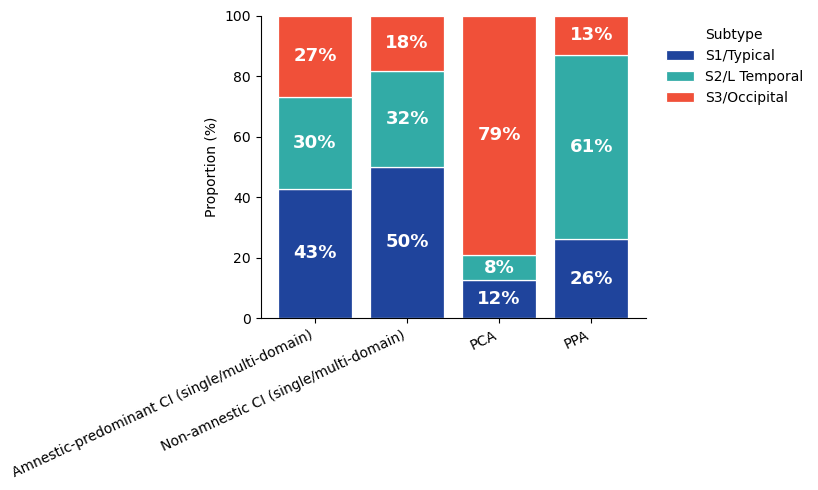

In [50]:
 
df = t1.copy()

subtype_map = {
    1: "S1/Typical",
    2: "S2/L Temporal",
    3: "S3/Occipital",
    "1": "S1/Typical",
    "2": "S2/L Temporal",
    "3": "S3/Occipital",
}
subtype_order = ["S1/Typical", "S2/L Temporal", "S3/Occipital"]

subtype_color_scheme = {
    "S1/Typical": "#1f449c",
    "S2/L Temporal": "#32ABA6",
    "S3/Occipital": "#f05039",
}

df["subtype_label"] = df["subtype"].map(subtype_map).fillna(df["subtype"].astype(str))
df["Cognitive Behavior"] = df["Cognitive Behavior"].astype(str).str.strip()

# ----------------------------
# OPTIONAL: filter here if needed
# Example: if you only want amnestic because total N is too large or to match reviewer request.
# df_plot = df[df["Cognitive Behavior"].str.contains("Amnestic", case=False, na=False)].copy()
# Otherwise, use all:
df_plot = df.copy()

# ----------------------------
# Aggregate to proportions per phenotype (bars are phenotypes, stacks are subtypes)
# ----------------------------
count_tab = (
    df_plot
    .groupby(["Cognitive Behavior", "subtype_label"])
    .size()
    .unstack(fill_value=0)
)

# keep subtype columns in fixed order if present
count_tab = count_tab.reindex(columns=[s for s in subtype_order if s in count_tab.columns])

# proportions within each phenotype (row sums to 1)
prop_tab = count_tab.div(count_tab.sum(axis=1), axis=0).fillna(0)

# optional: choose a stable phenotype ordering (alphabetical). replace with your preferred list if you have one.
phenotype_order = sorted(prop_tab.index.tolist())
prop_tab = prop_tab.reindex(phenotype_order)

# ----------------------------
# Plot: 100% stacked bars (equal height)
# ----------------------------
fig, ax = plt.subplots(figsize=(8, 5))

bottom = np.zeros(len(prop_tab))
x = np.arange(len(prop_tab))

for subtype in prop_tab.columns:
    vals = prop_tab[subtype].values
    ax.bar(
        x,
        vals,
        bottom=bottom,
        color=subtype_color_scheme.get(subtype, "gray"),
        edgecolor="white",
        linewidth=0.9,
       # alpha=0.8,
        label=subtype,
    )

    # integer % labels (only if segment is >= 5% to avoid clutter; adjust threshold as you want)
    for i, (b, v) in enumerate(zip(bottom, vals)):
        pct = int(round(v * 100))
        if pct >= 5:  # <-- change to (pct > 0) if you truly want all non-zero segments labeled
            ax.text(
            i,
            b + v / 2,
            f"{pct}%",
            ha="center",
            va="center",
            fontsize=13,         
            fontweight="bold",   
            color="white"
        )

    bottom += vals

# axis formatting
ax.set_xticks(x)
ax.set_xticklabels(prop_tab.index, rotation=25, ha="right")
ax.set_ylabel("Proportion (%)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(round(y*100))}"))
ax.set_ylim(0, 1)

# optional: add N per phenotype under x tick label (often useful)
# n_per = count_tab.sum(axis=1).reindex(prop_tab.index)
# ax.set_xticklabels([f"{p}\n(n={n_per.loc[p]})" for p in prop_tab.index], rotation=25, ha="right")

ax.legend(title="Subtype", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.show()
